In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import numpy as np

from matplotlib_venn import venn3_unweighted, venn3_circles
from collections import Counter

In [2]:
def plot_bar_frequencies(labels, frequencies, title, x_max=20, step_size=2, fig_size=(6.4, 4.8)):
    plt.figure(figsize=fig_size)
    plt.barh(labels, frequencies, color = 'lightgray', edgecolor = 'black')

    for index, value in enumerate(frequencies):
        plt.text(value, index - 0.05, "  " + str(value))

    # https://stackoverflow.com/questions/46795840/matplotlib-float-values-on-the-axis-instead-of-integers
    locator = ticker.MultipleLocator(step_size)
    plt.gca().xaxis.set_major_locator(locator)
    formatter = ticker.StrMethodFormatter("{x:.0f}")
    plt.gca().xaxis.set_major_formatter(formatter)

    plt.xlim([0, x_max])
    plt.savefig(f'figures/{title}.pdf', bbox_inches='tight')

In [3]:
def plot_venn_3_frequencies(labels, subset_frequencies, title, subset_areas=None, fig_size=(6.4, 4.8)):
    label_colors = ['lightblue', 'limegreen', 'tomato']
    plt.figure(figsize=fig_size)

    circles = venn3_unweighted(
        subsets=subset_frequencies,
        subset_areas=subset_areas if subset_areas else subset_frequencies,
        set_labels=labels,
        alpha=1,
        set_colors=label_colors
    )
    venn3_circles(
        subsets=subset_areas if subset_areas else subset_frequencies,
        alpha = 0.5
    )
    for idx, subset in enumerate(circles.set_labels):
         circles.set_labels[idx].set_visible(False)

    plt.legend(
        handles=[mpatches.Patch(color=label_colors[i], label=label) for i, label in enumerate(labels)],
        bbox_to_anchor=(1, 1),
        bbox_transform=plt.gcf().transFigure
    )
    
    plt.savefig(f'figures/{title}.pdf')

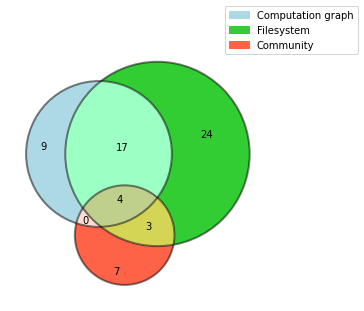

In [4]:
plot_venn_3_frequencies(
    ['Computation graph', 'Filesystem', 'Community'],
    [9, 24, 17, 7, 0, 3, 4],
    'ros_ecosystem_level',
    [9, 24, 17, 7, 0, 3, 4],
)

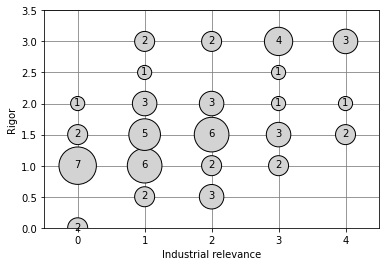

In [10]:
import numpy as np

# create data
rigor =     [0, 0.5, 0.5, 1, 1, 1, 1, 1.5, 1.5, 1.5, 1.5, 1.5, 2, 2, 2, 2, 2, 2.5, 2.5, 3, 3, 3, 3]
relevance = [0,   1,   2, 0, 1, 2, 3,   0,   1,   2,   3,   4, 0, 1, 2, 3, 4,   1,   3, 1, 2, 3, 4]
frequencies = np.array(
            [2,   2,   3, 7, 6, 2, 2,   2,   5,   6,   3,   2, 1, 3, 3, 1, 1,   1,   1, 2, 2, 4, 3])

fig = plt.figure()    
ax = fig.add_subplot(1,1,1)
ax.yaxis.grid(color='gray')
ax.xaxis.grid(color='gray')
ax.set_axisbelow(True)
 
# Change color with c and alpha
plt.scatter(relevance, rigor, s=frequencies*200, c="lightgray", edgecolor="black")

for relevance_val, rigor_val, frequency_val in zip(relevance, rigor, frequencies):
    plt.text(relevance_val - 0.05, rigor_val - 0.03, frequency_val)

locator = ticker.MultipleLocator(1)
plt.gca().xaxis.set_major_locator(locator)
formatter = ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlim([-0.5, 4.5])
plt.ylim([0, 3.5])
plt.ylabel('Rigor')
plt.xlabel('Industrial relevance')
#plt.show()
plt.savefig('figures/rigor_relevance.pdf', bbox_inches='tight')